# `unyts`
A package that consider quantities (values with units) instead of purely numerical values:
- **units**: instances capable of making arithmetic and logical operations of values with different units
- **convert**: a units converter able to convert practically between any pair units

# Installing `unyts`

This package is published in <a href="https://pypi.org/search/?q=unyts">pypi.org</a> and can be installed using **pip**:  
  
`pip install unyts`
  
or upgrade to the latest version:

`pip install --upgrade unyts`

# Graphical User Interface

To launch the GUI:

- from python console:  
    `from unyts import start_gui`  
    `start_gui()`  
  
- from command prompt or terminal:  
    `python -m unyts`  
<img src="unyts_gui.jpg" alt="drawing" width="300"/>  

# `import unyts`
Import the package to be able to change settings...

In [1]:
import unyts

...like the algorithm used to search for conversions:

In [2]:
unyts.set_algorithm('lean_BFS')

In [3]:
unyts.__version__

'0.9.13'

## Importing the utilities `convert` and `units`

Importing just the utilities will be enought to be able to convert values and to instantiate the appropriate Unit subclass and operate with them.

In [4]:
from unyts import convert, units

## Importing the `Unit` class

In case you need it, you can import the main **`Unit` class**, to check if something `isinstance()` of `Unit`.  

It is recommended to instantiate using the function `units`  or the appropiate subclass, as using the class `Unit`to instantiate _values with units_ will return instances of the main class.

In [5]:
from unyts import Unit

In [6]:
ounce = Unit(1, 'ounce')
print(type(ounce), ounce)

Unit 1_ounce


# The `units` function
To make instances of **`Unit`** use the function **`units`** providing it with the _value_ and a _string representing the units_ as arguments of the function call:

In [7]:
from unyts import units

In [8]:
length_1 = units(3, 'm')
length_2 = units(250, 'cm')
length_3 = units(0.003, 'km')
length_4 = units(6.5, 'ft')
length_5 = units(18, 'in')

The **units** function returns the apropriate **unit _subclass_**: 

In [9]:
print(type(length_1))
type(units(333, 'ml'))

Length


Volume

Any subclass of __unyts__ will be an instance of it, thus, the appropriate way to check if a variable points to an instance of __untys__ is using `isinstance()` function instead of using `type` as type will return the subclass.  

# Check instance of `Unit`

Checking any Unit subcalls using `isinstance()` will always work:

In [10]:
isinstance(length_1, Unit)

True

But comparing the type of the subcalls to Unit class will fail

In [11]:
type(length_1) is Unit

False

In case you need to check the subclass, you can import it following the path indicated by `type`:

In [12]:
type(length_1)

Length

In [13]:
from unyts.units.geometry import Length

In [14]:
type(length_1) is Length

True

# Quantities representation 
The representation of the units instances consists in the value followed by the units string

In [15]:
print(length_1)
print(length_2)
print(length_3)
length_4

3_m
250_cm
0.003_km


6.5_ft

# The conversion path

By default, the path followed to convert from one unit to other will be printed out.
This behaviour can be changed using the function `print_path`.  

## Printhing the conversion path

In [16]:
length_1 + length_2

5.5_m

In [17]:
convert(1, 'Ksm3', 'stb')

6289.813999999999

## Not printing the conversion path

Set the `print_path` to `False`:

In [18]:
unyts.print_path(False)

From now, the conversion path will not be printed:

In [19]:
length_1 + length_2

5.5_m

This behaviour is saved into the init file, then it il be rememberd the next time `unyts` is used.  

To print the conversion path again, simply set the parameter to True:

In [20]:
unyts.print_path(True)

In [21]:
length_1 + length_2

5.5_m

In [22]:
length_2 + length_5

295.72_cm

Calling print_path without argument will change it from the current behaviour:

In [23]:
unyts.print_path()

In [24]:
unyts.print_path()

# Attributes of the `Unit` instances

Two attributes can be handy for the user in certain applications:
- `.value` contains the numeric value
- `.unit` contains a string representing the units
- `.name` contains a string representing the type of the units

In [25]:
length_1.value

3

In [26]:
length_1.unit

'm'

In [27]:
length_1.name

'length'

To get the `.value` or `.unit` attributes while coding, it could be safer to use ther respective getters:
- `.get_value()`
- `.get_unit()`

In [28]:
length_1.get_value()

3

In [29]:
length_1.get_unit()

'm'

# Arithmetic operations
Simply operate with the instances of `Unit` as with regular Python variables:

## Addition and substraction

In [30]:
print(length_1, '+', length_2, '=', length_1 + length_2)

3_m + 250_cm = 5.5_m


I will turn the `print_path` to have clean output in the following operations.

In [31]:
unyts.print_path(False)

All the units are **converted to the _first_ units** when making operations:

In [32]:
print(length_1, '** 2', '+', length_4, '*', length_2)
print(length_1 ** 2, '+', length_4 * length_2)
print('=', length_1 ** 2 + length_4 * length_2)

3_m ** 2 + 6.5_ft * 250_cm
9_m2 + 53.313648293963254_ft2
= 13.953_m2


defining area units

In [33]:
area_1 = units(12, 'm2')
area_1

12_m2

and have their own subclass

In [34]:
type(area_1)

Area

<font color='red'>Keep in mind that the **addition of different subclasses of Unit is not possible** and will return a `tuple` of both units:</font>

In [35]:
(area_1 + length_1)

(12_m2, 3_m)

Then, addition of tuples of Unit will simply return the contenation of the tuples:

In [36]:
(area_1 + length_1) + (area_1 + length_2)

(12_m2, 3_m, 12_m2, 250_cm)

Further operations with these tuples of units is not yet implemented and will rise error or might return not the desired operation.

## Product and division
Product of units return new units:

In [37]:
area_2 = length_4 * length_2
area_2

53.313648293963254_ft2

In [38]:
area_2 * length_1

524.740632814599_ft3

Division of units return new units as well:

In [39]:
area_2 / length_1

5.416666666666666_ft

## Operations with _not_-`Unit` instances

It is possible to make algebraic operations of `Unit` with adimensional numbers (`int`, `float`).  
The behaviour will depend on the operation:
- addition: will _assume_ the adimensional number as the same units of the instance
- product: will simple multiply the value of the unyt number
  
Recall that the variable `length_1` contains *3_m*:

In [40]:
length_1

3_m

now let's try some operations:

In [41]:
length_1 * 3

9_m

In [42]:
length_1 / 2

1.5_m

In [43]:
length_1 + 2

5_m

# Logical operations

Logical operators transform second value to the units of first value before comparing

In [44]:
print('length_4:', length_4 , 'equivalent to', length_4.to('cm'))
print('length_2:', length_2 , 'equivalent to', length_2.to(length_4))

print(length_4, '>', length_2)
length_4 > length_2

length_4: 6.5_ft equivalent to 198.12_cm
length_2: 250_cm equivalent to 8.202099737532809_ft
6.5_ft > 250_cm


False

In [45]:
print('area_1:', area_1)
print('area_2:', area_2)

print(area_1, '<', area_2)
area_1 < area_2

area_1: 12_m2
area_2: 53.313648293963254_ft2
12_m2 < 53.313648293963254_ft2


False

In [46]:
area_1 / 10 < area_2

True

# The `.to()` method
Use the method **`.to`** to convert the instance value to other units of the same kind:

In [47]:
area_2.to('m2')

4.953_m2

In [48]:
1000*area_1.to('acre')

2.9652645776059843_acre

In [49]:
units(333, 'cc').to('l')

0.333_l

In [50]:
# let's print the following conversion
unyts.print_path(True)

In [51]:
units(333, 'ml').to('oz')

11.260069559713717_oz

In [52]:
unyts.print_path(False)

# Examples of use

_area_ times _length_ returns _volume_

In [53]:
volume_1 = area_1 * length_1
print('type:', type(volume_1))
volume_1

type: Volume


36_m3

This _volume_ divided by _time_ returns _rate_:

In [54]:
rate_1 = volume_1 / units(1, 'day')
print('type:', type(rate_1))
print(rate_1)
print(rate_1, 'to field units:', rate_1.to('stb/day'))
print(rate_1, 'to litres per hour:', rate_1.to('l/hr'))
print('or in thousand cubic feer accumulated over one year:', rate_1.to('Mscf/year'))

type: Rate
36.0_m3/day
36.0_m3/day to field units: 226.433304_stb/day
36.0_m3/day to litres per hour: 1500.0_l/hr
or in thousand cubic feer accumulated over one year: 464.3525527208535_Mscf/year


Multiple products and conversions:

In [55]:
volume_2 = length_4 * length_3 * length_2
volume_2

524.740632814599_ft3

In [56]:
volume_2.to('m3')

14.859000000000002_m3

In [57]:
volume_2.to('scf')

524.740632814599_scf

In [58]:
volume_2.to('stb')

93.4602871405253_stb

In [59]:
volume_2.to('stb') == volume_2

True

In [60]:
print(volume_2, '/', area_2, '=', volume_2/area_2)

524.740632814599_ft3 / 53.313648293963254_ft2 = 9.842519685039372_ft


In [61]:
print(volume_1, '/', area_2, '=', volume_1/area_2)

36_m3 / 53.313648293963254_ft2 = 7.26832222895215_m


In [62]:
time_1 = units(1.5, 'hr')
print('type:', type(time_1))
time_1

type: Time


1.5_hr

In [63]:
time_1.to('min')

90.0_min

In [64]:
time_2 = units(5, 'sec')
time_2

5_sec

In [65]:
speed_1 = length_4 / time_2
print('type:', type(speed_1))
speed_1

type: Velocity


1.3_ft/sec

In [66]:
speed_1.to('km/hr')

1.4264640000000002_km/hr

In [67]:
speed_2 = units(100, 'km/hr')
speed_2

100_km/hr

In [68]:
speed_2.to('mi/hr')

62.13711922373339_mi/hr

In [69]:
productivity_index_1 = units(2.7, 'stb/day/psia')
print('type:', type(productivity_index_1))
productivity_index_1

type: ProductivityIndex


2.7_stb/day/psia

In [70]:
productivity_index_1.to('sm3/day/barsa')

6.225969351032321_sm3/day/barsa

In [71]:
productivity_index_1.to('cc/min/kPa')

43.2358982710578_cc/min/kPa

# Working with NumPy arrays
simply provide the array as the first argument of **`units()`** function:

In [72]:
import numpy as np

In [73]:
array_1 = np.random.rand(10)
array_1

array([0.49561789, 0.70079343, 0.34029044, 0.87975754, 0.34710335,
       0.58764527, 0.63782833, 0.81389363, 0.40955612, 0.70558796])

In [74]:
mass_1 = units(array_1, 'kg')

In [75]:
mass_1

[0.49561789 0.70079343 0.34029044 0.87975754 0.34710335 0.58764527
 0.63782833 0.81389363 0.40955612 0.70558796]_kg

In [76]:
mass_1.to('g')

[495.61788784 700.79342974 340.29043814 879.75754236 347.10334867
 587.64527234 637.82833216 813.89362601 409.55612059 705.58795802]_g

In [77]:
mass_2 = units(np.random.rand(10), 'lb')
mass_2

[0.32334695 0.12772004 0.57216885 0.33865054 0.76438473 0.86512331
 0.84242106 0.68224053 0.91709046 0.63945051]_lb

In [78]:
mass_2 + mass_1

[1.41599735 1.67270509 1.32238085 2.27818392 1.52961662 2.16065938
 2.24859183 2.47656883 1.82000715 2.19500568]_lb

# The `convert` function
The units converter function, **`convert()`** can be used directly, providing the following arguments:
- `value`: _int_, _float_, _np.array_, etc, the value to be converted
- `from_units`: _str_ the input units
- `to_units`: _str_, the desired output units
- `print_path`: [optional] _bool_, set to True to request printing the conversion path. Default behaviour is defined by the `print_path()` setting.

In [79]:
from unyts import convert

In [80]:
convert(2, 'week', 'day')

14

In [81]:
convert(1, 'day', 'minute')

1440

In [82]:
convert(1, 'week', 'second', True)

604800

In [83]:
convert(1, 'psia', 'g/cm2', True)

70.30695796391595

- optional, fourth argument set to **True** will return the conversion path.   
To avoid anoying print outs, the conversion path is printed only the first time it is used:

In [84]:
convert(1, 'mile', 'km', True)

1.609344

In [85]:
convert(1, 'nautical mile', 'km', True)

1.852

In [86]:
convert(1, 'scandinavian mile', 'km', True)

10

In [87]:
convert(30, 'm3/month', 'l/day', True)

985.6262833675565

In [88]:
convert(0.35, 'psi/ft', 'bar/m', True)

0.07917208177742135

In [89]:
convert(0.35, 'psi/ft', 'g/cc', True)

0.8073305540475911

In [90]:
convert(0.07917208177742135, 'bar/m', 'psi/ft', True)

0.3499999999999999

In [91]:
convert(0.433, 'barsa/m', 'psia/ft', True)

1.9141848565515385

In [92]:
convert(14.7, 'psia', 'lb/in2', True)

14.7

In [93]:
convert(1, 'kg/cm2', 'lb/in2', True)

14.223343307314792

convert(1, 'kg/cm2', 'psia', True)

In [94]:
convert(1, 'g/cm2', 'lb/in2', True)

0.014223343307119564

In [95]:
convert(10, 'API', 'lb/ft3', True)

62.427960576144606

In [96]:
convert(55, 'lb/scf', 'API', True)

29.11011675499026

In [97]:
convert(10, 'API', 'g/cc', True)

1.0

In [98]:
convert(1, 'g/cm3', 'API', True)

10.0

## if `value` argument is instance of `Unit`
If `value` argument is an instance of the `Unit` class, the third argument (`to_unit`) might be left default (or the provided class `Empty`).  
In this case `value` will be converted from its units to the units provided in the argument `from_unit`.

In [99]:
print("`mass_1` is and instance of the `Unit` class:", mass_1, sep='\n')
convert(mass_1, 'lb')

`mass_1` is and instance of the `Unit` class:
[0.49561789 0.70079343 0.34029044 0.87975754 0.34710335 0.58764527
 0.63782833 0.81389363 0.40955612 0.70558796]_kg


array([1.09265041, 1.54498505, 0.750212  , 1.93953338, 0.76523189,
       1.29553606, 1.40617077, 1.7943283 , 0.90291669, 1.55555517])

### `Empty`, instead of `None`
It is important to hightlight that the `None` value as argument in the `convert` function will indicate the conversion to a dimensionless value.  
  
To provide the default _Empty_ value for an argument, the provided value `Empty` should be used. Notice that is only accepted in the second argument (`to_unit`) and will be valid only if the `value` argument is an instance of `Unit`.  
The `Empty` instance can be imported from `unyts`:

In [100]:
from unyts import Empty

In [101]:
convert(mass_1, 'lb', Empty)

array([1.09265041, 1.54498505, 0.750212  , 1.93953338, 0.76523189,
       1.29553606, 1.40617077, 1.7943283 , 0.90291669, 1.55555517])

# Getting a conversion `function` for later use

Optionally, the first argument (_value_) of the function `convert` can be set `None`. In this case, a `lambda` with the conversion will be returned. This _lambda_ can be saved into a variable for later use.

In [102]:
temperature_conversion = convert(None, 'F', 'C', True)

In [103]:
temperature_conversion(85)

29.444444444444443

# Preloaded unitary units

In some ocassions it could be handy use the preloaded variables of basic units in order to make new instances of any units as production of numbers with the basic units, like (not exhaustive list):
- `meter` or `metre`
- `foot` or `feet`
- `inch`
- `second`, `minute`, `hour`, `day`, `week`, `month` and `year`
- `gram` and `kilogram`
- `ounce`, `pound` and `ton`
- `pascal`, `kilopascal`, `torr`, `psi`, `bar` and `atmosphere`

In [104]:
from unyts.unitary import *

In [105]:
5 * yard

5_yd

In [106]:
36 * meter * meter

36_m2

In [107]:
3 * foot / second

3.0_ft/sec

In [108]:
3 * ounce

3_oz

# The special case of _ounce_

Considering that the unit **ounce** can be associated to volume or to weiht, calling `units()` function with unit argumento _'ounce'_ or _'oz'_ will return a generic **Unit** instance (not the specific subclass of Unit):

In [109]:
oz = units(2.5, 'ounce')
oz

2.5_ounce

In [110]:
type(oz)

Unit

This generic instance is able to be converted to other weight or volume quantities and only then it will be instantiated as the appropiate subclass:

In [111]:
v = oz.to('ml')
print(v)
type(v)

73.9337859441888_ml


Volume

In [112]:
w = oz.to('g')
print(w)
type(w)

70.87380781249999_g


Weight

# The search algorithm _[optional]_
On version 0.9.0 alternative algorithms to search through the units network were defined. Previously only BFS algorithm could be used.  
The available algorithms now are:
- **BFS** _Breadth-First Search_: searches through the entire graph network, deepening one level at a time. BFS will always return the shortest path connecting two units, but migth be slow to find a path between two distant nodes (units).
- **DFS** _Depth-First Search_: searches through the entire graph network, one branch at time. DFS will return the first path found and might be faster than BFS when looking for a path between two distant nodes.
- **lean_BFS** _preprocessed lean network for Breadth-First Search_: cleans up the network, by filtering out the nodes (units) that are not part of any possible path between the two units being converted. The resulting slimmed graph network is then feeded to the BFS algorithm to find the shortest possible path. This implementation will return the shortest path in less time that the traditional BFS algorithm, particularly for conversions that BFS takes very long time to solve.

Default algorithm is **lean_BFS**.

## View or change the search algorithm
The active search algorithm can be viewed by calling the function `get_algorithm()` or changed by calling the function `set_algorithm()` providing a string with the desired name of the algorithm. The only valid strings are: `'BFS'`, `'DFS'`, `'lean_BFS'`, or `'hybrid_BFS'`.

In [113]:
unyts.get_algorithm()

'lean_BFS'

The different algorithms should find the same path, but in some cases DFS might result in longer paths than BFS.  
The following examples illustrate the different algorithms:

In [114]:
import time
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [115]:
def compare_algorithms(algorithm=['BFS', 'DFS', 'lean_BFS'], 
                       value=0.1, from_unit='bar/m', to_unit='g/cc',
                       print_path=True, verbose=False):
    comparison = {}
    unyts.print_path(print_path)
    unyts.verbose(verbose)
    if type(algorithm) is str:
        algorithm = [algorithm]
    time.sleep(1)
    
    for each in algorithm:
        algo, parallel = each, None
        if each.startswith('hybrid_BFS') and ':' in each:
            algo, parallel = each.split(':')
        if verbose or print_path:
            print()
            print(f"** {algo} algorithm **")
        time.sleep(1)
        unyts.set_algorithm(algo)
        if parallel == 'threading':
            unyts.set_parallel('t')
        elif parallel == 'serial':
            unyts.set_parallel(False)
        # unyts.clean_memory()
        start = time.process_time_ns()
        try:
            c = convert(value, from_unit, to_unit, print_path, use_cache=False)
        except:
            c = 'failed'
        end = time.process_time_ns()
        comparison[each] = (end - start) / 1e9
        if verbose or print_path:
            print(f"{each}: conversion {c} took {comparison[each]} seconds")
    
    return comparison

In [116]:
comparison = compare_algorithms()


** BFS algorithm **


BFS: conversion 1.0197162129779282 took 3.921875 seconds

** DFS algorithm **


DFS: conversion 1.0197162129779282 took 4.421875 seconds

** lean_BFS algorithm **


lean_BFS: conversion 1.0197162129779282 took 1.1875 seconds


It is noticeable that the different algorithms has different speeds and advantages.  
Let's compare the time for the previous examples:

{'BFS': 3.921875, 'DFS': 4.421875, 'lean_BFS': 1.1875}


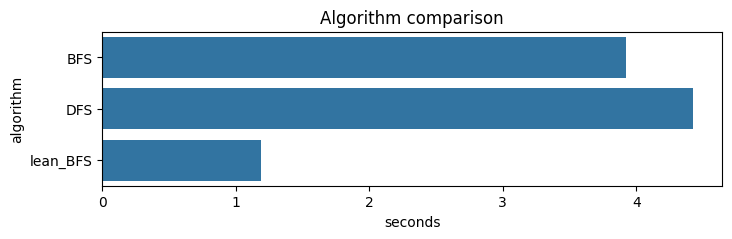

In [117]:
print(comparison)

fig, ax = plt.subplots(figsize=(8, 2))
ax = sns.barplot(pd.Series(comparison), orient='h', ax=ax)
ax.set_xlabel('seconds')
ax.set_ylabel('algorithm')
ax.set_title('Algorithm comparison')
plt.show()

## Speed of each algorithm
In some cases **BFS** or **DFS** may be very slow (taking minutes to find a conversion path), those are the cases where **lean BFS** results to be much faster without loosing the precission of the BFS:

In [118]:
comparison = {}
unyts.verbose(False)

In [119]:
def time_search(algorithm=['BFS', 'DFS', 'lean_BFS'],
                value=0.1, from_unit='bar/m', to_unit='g/cc', rept=10):
    iterations = []
    for i in range(rept):
        this = compare_algorithms(algorithm=['BFS', 'DFS', 'lean_BFS'], 
                                  value=value, from_unit=from_unit, to_unit=to_unit,
                                  print_path=False, verbose=False)
        iterations.append(pd.Series(this))
    return iterations

In [120]:
t = time_search(value=0.1, from_unit='bar/m', to_unit='g/cc', rept=20)
comparison = pd.concat(t, axis=1).T

none of the algorithms performes really slow in this case, eventhoug, it is noticeable that **BFS** was much faster than the other two and that the overhead of the preselection of the **lean BFS** might be significative:

,BFS,DFS,lean_BFS
0,0.843750,4.406250,1.093750
1,0.859375,4.250000,1.078125
2,0.875000,4.093750,1.062500
3,0.812500,4.109375,1.062500
4,0.843750,4.109375,1.062500
5,0.843750,4.093750,1.078125
6,0.828125,4.109375,1.046875
7,0.812500,4.093750,1.062500
8,0.843750,4.078125,1.046875
9,0.828125,4.125000,1.062500


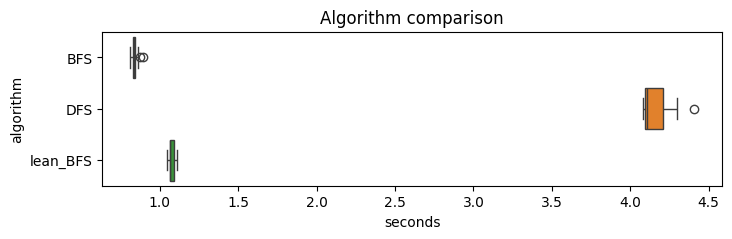

In [121]:
display(comparison)

fig, ax = plt.subplots(figsize=(8, 2))
ax = sns.boxplot(comparison, orient='h', ax=ax)
ax.set_xlabel('seconds')
ax.set_ylabel('algorithm')
ax.set_title('Algorithm comparison')
plt.show()

But, in other cases:

In [122]:
comparison = time_search(value=1000, from_unit='kg/m3', to_unit='psi/ft', rept=1)[0]

BFS         29.890625
DFS         15.750000
lean_BFS     1.109375
dtype: float64


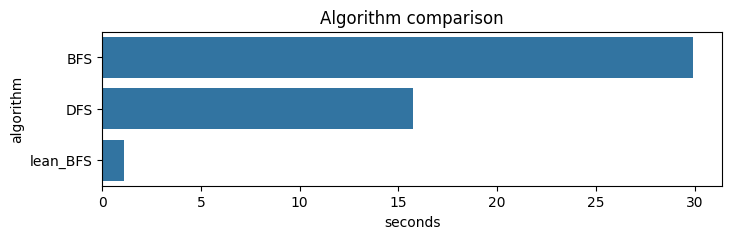

In [123]:
print(comparison)

fig, ax = plt.subplots(figsize=(8, 2))
ax = sns.barplot(pd.Series(comparison), orient='h', ax=ax)
ax.set_xlabel('seconds')
ax.set_ylabel('algorithm')
ax.set_title('Algorithm comparison')
plt.show()

In [124]:
t = time_search(value=1000, from_unit='kg/m3', to_unit='psi/ft', rept=5)
comparison = pd.concat(t, axis=1).T

the difference becomes sigificative, and the overhead of **lean BFS** has been well paid:

,BFS,DFS,lean_BFS
0,30.093750,3.093750,1.125000
1,29.906250,3.062500,1.109375
2,29.984375,3.078125,1.156250
3,29.953125,3.062500,1.125000
4,29.875000,3.062500,1.125000


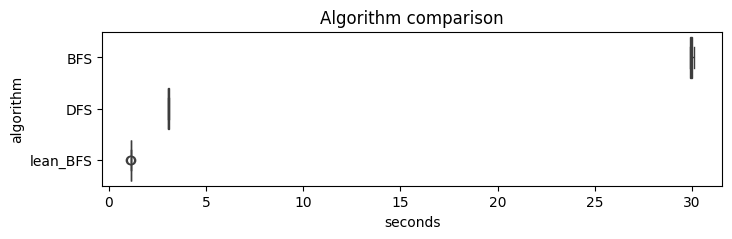

In [125]:
display(comparison)

fig, ax = plt.subplots(figsize=(8, 2))
ax = sns.boxplot(comparison, orient='h', ax=ax)
ax.set_xlabel('seconds')
ax.set_ylabel('algorithm')
ax.set_title('Algorithm comparison')
plt.show()

**lean_BFS** becomes the default option, as it takes benefit of the strengh of *BFS* algorithm while limiting the search .

## timeout
In this previous example, the **BFS** algorith search exceed the _default timeout of 30 seconds_ and the search returns no result.  
Using the default algorithm, thise timeout should not be an issue.  
 
### `set_timeout()`
The timeout can be changed in two ways:
- under in the _Options_ menu of the GUI,
- or calling the funtion `set_timeout` and provide
    - and `ìnt` of the desired timeout as seconds. 
    - `0`, `False` or a negative value to deactivate the search time limitation
    - `True` or no argument to reset the default value
  
The following cells illustrates these command options:

In [126]:
unyts.set_timeout(300)

In [127]:
unyts.set_timeout(False)

In [128]:
unyts.set_timeout(True)

## Particularities of the algorithms BFS and DFS  
**DFS** might return wrong results, in cases where one of the converted units has an ambiguos name, like _absolute_ and _gauge_ pressures when not especified (`'psi'` and `'bar'`) that might be interpreted as absolute or gauge depending on the context...  

Here below a few examples:

In [129]:
unyts.set_algorithm('DFS')
unyts.clean_memory()
convert(10, 'Pa', 'psi', True)

-14.694498398337844

In [130]:
unyts.set_algorithm('DFS')
unyts.clean_memory()
convert(1, 'bara', 'psi', True)

-0.19217500249516478

while **BFS** will not have this issue as it will always find the shortest path:

In [131]:
unyts.set_algorithm('BFS')
unyts.clean_memory()
convert(10, 'Pa', 'psi', True)

0.0014503773773220001

In [132]:
unyts.set_algorithm('BFS')
unyts.clean_memory()
convert(1, 'bara', 'psi', True)

14.50377377322

To avoid this behaviour, the specific unit name can be used:

In [133]:
unyts.set_algorithm('DFS')
unyts.clean_memory()
convert(1, 'bara', 'psia', True)

14.503724997504834

In [134]:
unyts.set_algorithm('DFS')
unyts.clean_memory()
convert(1, 'bara', 'psig', True)

-0.19217500249516478

In these ambiguous cases, **BFS** will return the shortest path which will be relative to the units being converted:

In [135]:
unyts.set_algorithm('BFS')
unyts.clean_memory()
convert(1, 'bar', 'psia', True)

14.50377377322

In [136]:
unyts.set_algorithm('BFS')
unyts.clean_memory()
convert(1, 'bar', 'psig', True)

14.50377377322

# know issues

## convertion of `bar/m` to `g/cc` _corrected!_
**The converter has been improved** and will not raise <font color='darkred'>**NoConversionFoundError**</font>

In [137]:
unyts.set_algorithm('lean_BFS')

In [138]:
convert(0.1, 'bar/m', 'g/cc', True)

1.0197162129779282

In [139]:
convert(1000, 'kg/m3', 'psi/ft', True)

0.43352750400100415

In [140]:
convert(1, 'g/cm3', 'Pa/cm', True)

1539.2419773288723

## SI prefixes for _m³_
The prefixes from the International System for the volume unit _m³_ (cubic meter) follows a cubic relationshit:
- **Q** _quetta_:  1E+90 
- **R** _ronna_ :  1E+81
- **Y** _yotta_ :  1E+72
- **Z** _zetta_ :  1E+63
- **E** _exa_   :  1E+54
- **P** _peta_  :  1E+45
- **T** _tera_  :  1E+36
- **G** _giga_  :  1E+27
- **M** _mega_  :  1E+18
- **k** _kilo_  :  1E+09
- **h** _hecto_ :  1E+06
- **d** _deci_  :  1E-03
- **c** _centi_ :  1E-06
- **m** _mili_  :  1E-09
- **µ** _micro_ :  1E-18
- **n** _nano_  :  1E-27
- **p** _pico_  :  1E-36
- **f** _femto_ :  1E-45
- **a** _atto_  :  1E-54
- **z** _zepto_ :  1E-63
- **y** _yocto_ :  1E-72
- **r** _ronto_ :  1E-81
- **q** _quecto_:  1E-90

but in some industrial uses it is commonly understood that **M** or **k** accompaining **m³** (*Mm³*, *km³*) stands for _millon_ (1E+06) of cubic meters and _thousands_ (1E+03) of cubic meters respectively, not _cubic megameter_ or _cubic kilometer_.  

This might produce unwanted results when converting if the user understand the prefix as a quantity prefix, not a unit prefix. In other words, if *1_Mm³* should be read as *1000000_m³* converting *1_Mm³* to *m³* will not return the expected value:

In [141]:
convert(1, 'Mm³', 'm³')

1e+18

then it is convenient to use the alias unit **'sm3'** that has the SI prefixes defined as linear multipliers:

In [142]:
convert(1, 'Msm³', 'sm³')

1000000.0

In [143]:
convert(1, 'ksm³', 'm³')

1000.0